In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib as mpl

In [4]:
# Load the dataset (Data daily CSV file)
data = pd.read_csv('../data/data_daily.csv')

In [5]:
data.columns

Index(['# Date', 'Receipt_Count'], dtype='object')

In [6]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   # Date         365 non-null    object
 1   Receipt_Count  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None


In [7]:
data['Date'] = pd.to_datetime(data['# Date'])

In [8]:
# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(data.head(7))


First Few Rows of the Dataset:
       # Date  Receipt_Count       Date
0  2021-01-01        7564766 2021-01-01
1  2021-01-02        7455524 2021-01-02
2  2021-01-03        7095414 2021-01-03
3  2021-01-04        7666163 2021-01-04
4  2021-01-05        7771289 2021-01-05
5  2021-01-06        7473320 2021-01-06
6  2021-01-07        7832624 2021-01-07


In [16]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Receipt_Count
count   3.650000e+02
mean    8.826566e+06
std     7.820089e+05
min     7.095414e+06
25%     8.142874e+06
50%     8.799249e+06
75%     9.476970e+06
max     1.073886e+07


In [17]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
# Date           0
Receipt_Count    0
Date             0
dtype: int64


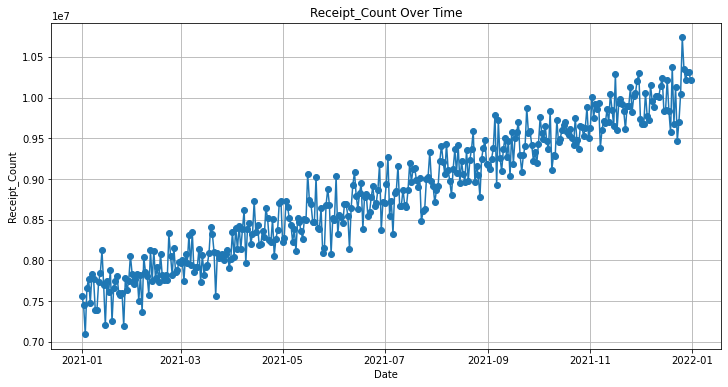

In [24]:
# Line plot to visualize the trend of Receipt_Count over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Receipt_Count'], marker='o', linestyle='-')
plt.title('Receipt_Count Over Time')
plt.xlabel('Date')
plt.ylabel('Receipt_Count')
plt.grid(True)
plt.show()

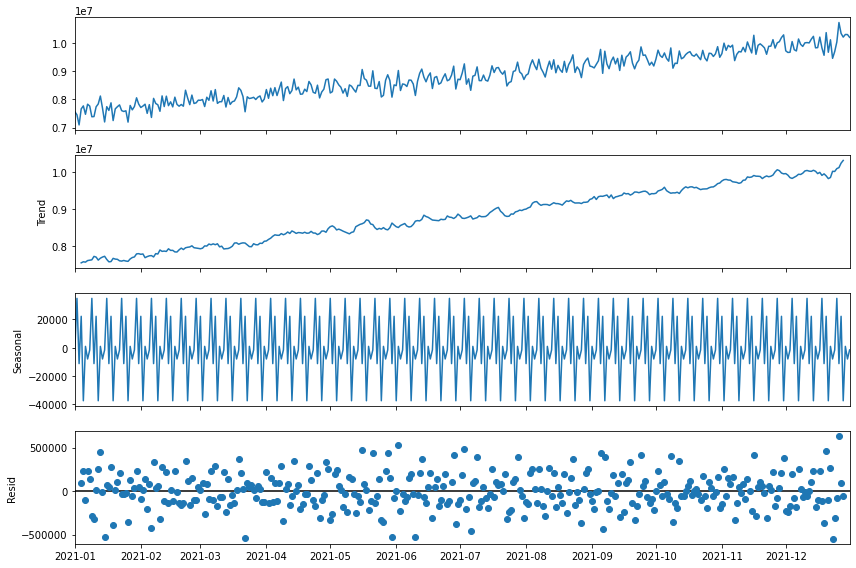

In [21]:
# Found trend and Seasonality
col = ["Date", "Receipt_Count"]
series = data[col]
series.set_index('Date', inplace=True)

with mpl.rc_context():
    mpl.rc("figure", figsize=(12,8))
    result = seasonal_decompose(series)
    result.plot()

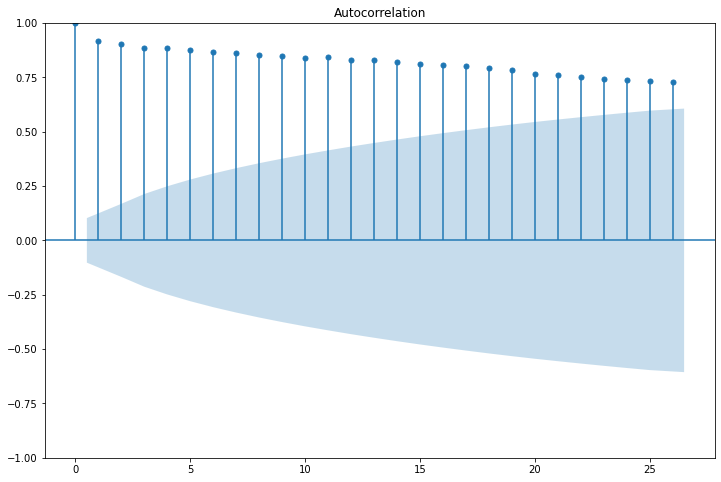

In [23]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(12,8))
    plot_acf(series)

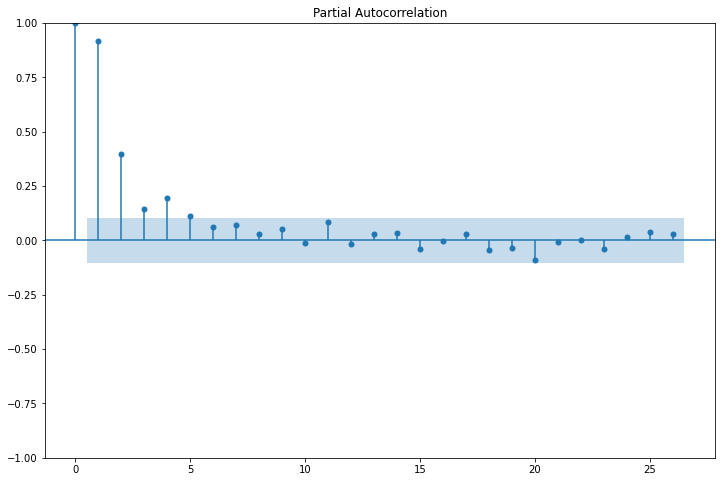

In [25]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(12,8))
    plot_pacf(series)

In [26]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(series["Receipt_Count"].values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

# high p-value suggests non-stationary (we saw trend too)

ADF test statistic: 0.17504416572004905
ADF p-values: 0.9708266454651421
ADF number of lags used: 17
ADF number of observations: 347
ADF critical values: {'1%': -3.449336554273722, '5%': -2.8699055166063085, '10%': -2.571226758215748}
ADF best information criterion: 9546.283513580593


In [27]:
# More Granular inspection of above facts through various statistical tools

data['7-Day Moving Avg'] = data['Receipt_Count'].rolling(window=7).mean()
data['30-Day Moving Avg'] = data['Receipt_Count'].rolling(window=30).mean()

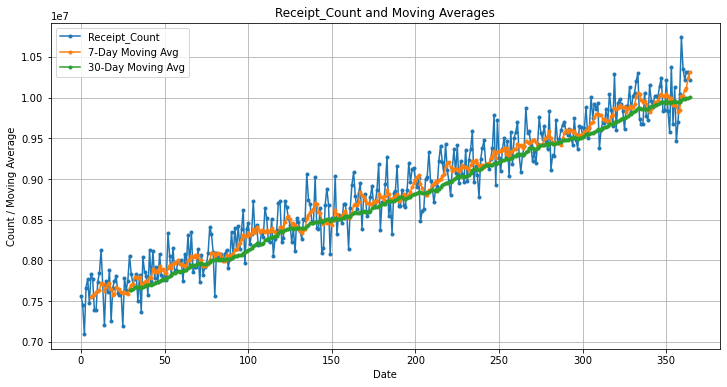

In [28]:
# Create a plot to visualize the moving averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Receipt_Count'], label='Receipt_Count', linestyle='-', marker='o', markersize=3)
plt.plot(data.index, data['7-Day Moving Avg'], label='7-Day Moving Avg', linestyle='-', marker='o', markersize=3)
plt.plot(data.index, data['30-Day Moving Avg'], label='30-Day Moving Avg', linestyle='-', marker='o', markersize=3)
plt.title('Receipt_Count and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Count / Moving Average')
plt.legend()
plt.grid(True)
plt.show()

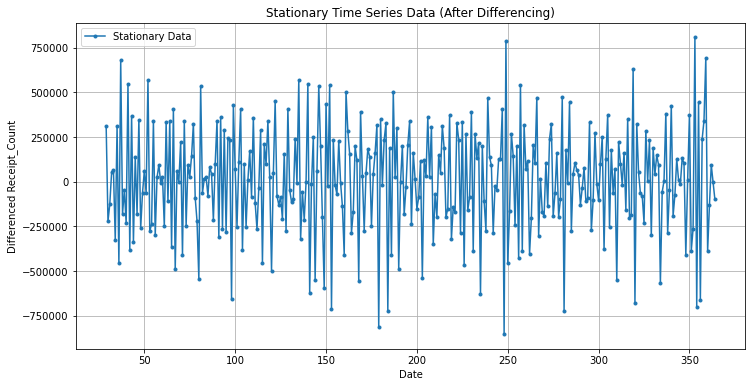

In [29]:
# stationary

# Perform first-order differencing to make the data stationary
data['Stationary_Data'] = data['Receipt_Count'].diff()

# Drop NaN resulting from differencing (for the first data point)
data.dropna(inplace=True)

# Create a plot to visualize the stationary data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Stationary_Data'], label='Stationary Data', linestyle='-', marker='o', markersize=3)
plt.title('Stationary Time Series Data (After Differencing)')
plt.xlabel('Date')
plt.ylabel('Differenced Receipt_Count')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(data["Stationary_Data"].values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

# smaller p-values on differencing

ADF test statistic: -8.783924915061714
ADF p-values: 2.3362292253551203e-14
ADF number of lags used: 17
ADF number of observations: 318
ADF critical values: {'1%': -3.451082300831733, '5%': -2.87067210822307, '10%': -2.5716355136268345}
ADF best information criterion: 8747.777242191285


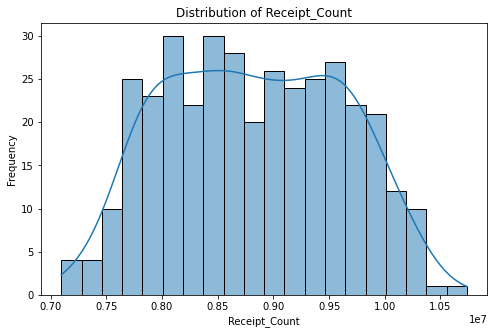

In [33]:
# Distribution plot of Receipt_Count
plt.figure(figsize=(8, 5))
sns.histplot(data['Receipt_Count'], bins=20, kde=True)
plt.title('Distribution of Receipt_Count')
plt.xlabel('Receipt_Count')
plt.ylabel('Frequency')
plt.show()

In [26]:
# New Feature: Is the Day falling on a weekend ?
data['is_weekend'] = data['Date'].apply(lambda x: 1 if x.weekday() >= 5 else 0)

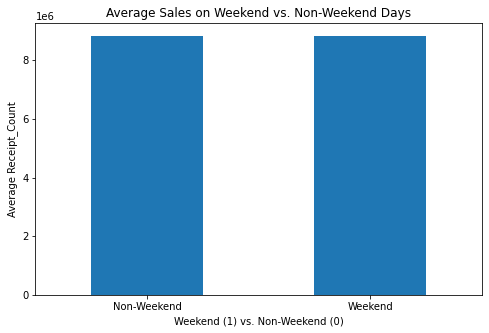

In [27]:
# Calculate the average sales for weekend and non-weekend days
average_sales = data.groupby('is_weekend')['Receipt_Count'].mean()

# Create a bar plot to visualize the difference
plt.figure(figsize=(8, 5))
average_sales.plot(kind='bar', rot=0)
plt.title('Average Sales on Weekend vs. Non-Weekend Days')
plt.xlabel('Weekend (1) vs. Non-Weekend (0)')
plt.ylabel('Average Receipt_Count')
plt.xticks([0, 1], ['Non-Weekend', 'Weekend'])
plt.show()

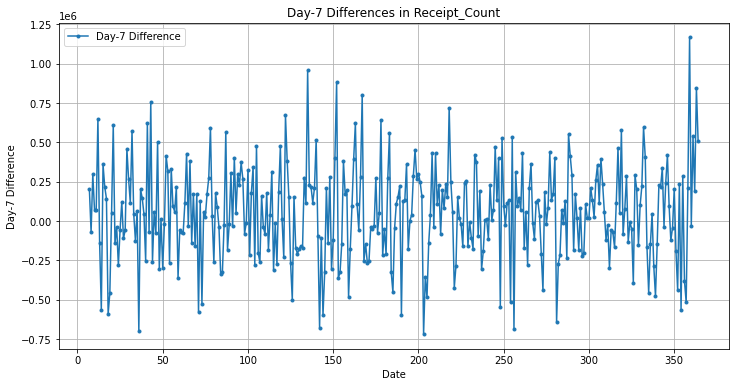

In [39]:
# Day N-Difference
N = 7
data[f'Day-{N} Difference'] = data['Receipt_Count'] - data['Receipt_Count'].shift(N)

# Create a plot to visualize the Day-N Differences
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[f'Day-{N} Difference'], label=f'Day-{N} Difference', linestyle='-', marker='o', markersize=3)
plt.title(f'Day-{N} Differences in Receipt_Count')
plt.xlabel('Date')
plt.ylabel(f'Day-{N} Difference')
plt.legend()
plt.grid(True)
plt.show()

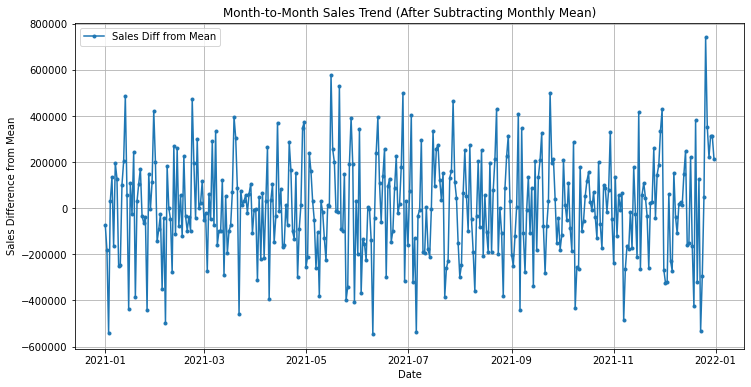

In [43]:
# Extract the 'Date' and 'Receipt_Count' columns
dates = data['Date']
receipt_count = data['Receipt_Count']


monthly_data = pd.DataFrame({'Date': dates, 'Receipt_Count': receipt_count})

# Calculate the monthly mean by grouping data by month and calculating the mean
monthly_mean = monthly_data.groupby(monthly_data['Date'].dt.to_period("M"))['Receipt_Count'].mean()

# Merge the monthly mean back into the original DataFrame
data['Monthly_Mean'] = data['Date'].dt.to_period("M").map(monthly_mean)
data['Sales_Diff_From_Mean'] = receipt_count - data['Monthly_Mean']


plt.figure(figsize=(12, 6))
plt.plot(dates, data['Sales_Diff_From_Mean'], label='Sales Diff from Mean', linestyle='-', marker='o', markersize=3)
plt.title('Month-to-Month Sales Trend (After Subtracting Monthly Mean)')
plt.xlabel('Date')
plt.ylabel('Sales Difference from Mean')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

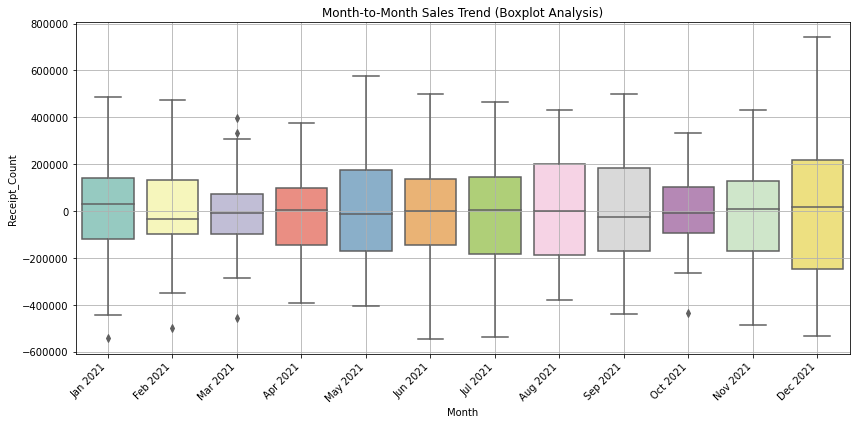

In [46]:
# Extract the 'Month' and 'Receipt_Count' columns
data['Month'] = data['Date'].dt.strftime('%b %Y')

# Create a boxplot to analyze the month-to-month trend
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Sales_Diff_From_Mean', data=data, palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Month-to-Month Sales Trend (Boxplot Analysis)')
plt.xlabel('Month')
plt.ylabel('Receipt_Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
data.columns

Index(['# Date', 'Receipt_Count', 'Date', 'is_weekend', '7-Day Moving Avg',
       '30-Day Moving Avg', 'Day-7 Difference', 'Day-15 Difference',
       'Day-30 Difference', 'Monthly_Mean', 'Sales_Diff_From_Mean', 'Month'],
      dtype='object')

### Analysis and Approach

As seen in the time series plot, the data looks like a linearly increasing time series with noise/flucatuation happening causing deviation from moving average. Weekends seem to have an impact on the sales value as the sales of the weekend equal that of non-weekend days (even though weekend comprise of 2 days only and weekdays comprise of 5), Hence it may form a viable feature to help capture short term deviations.